# Unit 5 - Financial Planning

In [1]:
# Initial imports
from dotenv import load_dotenv
import os
import requests
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables

load_dotenv()

alpaca_api_key = os.getenv("alpaca_api_key")
alpaca_secret_key = os.getenv("alpaca_secret_key")

#agg_response=requests.get(agg_request_url)

# Define the base request URL
alpaca=tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version="v2")

#print(json.dumps(agg_response, indent=4, sort_keys=True))


## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
import requests
import json
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_url_json = btc_url + "?format=json"
eth_url_json = eth_url + "?format=json"
# Execute get request
requests.get(btc_url_json)
requests.get(eth_url_json)

# Fetch current ETH price
# YOUR CODE HERE!

# Compute current value of my crpto
# YOUR CODE HERE!

# Print current crypto wallet balance
#print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
#print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

<Response [200]>

In [6]:
# Fetch current BTC price
# YOUR CODE HERE!
#btc_url_json = btc_url + "?format=json"
#eth_url_json = eth_url + "?format=json"
#print(btc_url_json)
#print(eth_url_json)

In [7]:
# Execute get request
#requests.get(btc_url_json)
#requests.get(eht_url_json)

In [17]:
# Execute GET request and store response btc_response
btc_response = requests.get(btc_url).json()
print(btc_response)

{'data': {'1': {'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'website_slug': 'bitcoin', 'rank': 1, 'circulating_supply': 19086243, 'total_supply': 19086243, 'max_supply': 21000000, 'quotes': {'USD': {'price': 19909.87, 'volume_24h': 23735878916, 'market_cap': 378641199973, 'percentage_change_1h': 0.268503773019096, 'percentage_change_24h': -1.73464770122056, 'percentage_change_7d': -1.83741860103432, 'percent_change_1h': 0.268503773019096, 'percent_change_24h': -1.73464770122056, 'percent_change_7d': -1.83741860103432}}, 'last_updated': 1657078747}}, 'metadata': {'timestamp': 1657078747, 'num_cryptocurrencies': 3116, 'error': None}}


In [18]:
## Execute GET request and store response eth_response
eth_response = requests.get(eth_url).json()
print(eth_response)

{'data': {'1027': {'id': 1027, 'name': 'Ethereum', 'symbol': 'ETH', 'website_slug': 'ethereum', 'rank': 2, 'circulating_supply': 119570465, 'total_supply': 119570465, 'max_supply': 119570634, 'quotes': {'USD': {'price': 1122.84, 'volume_24h': 15618681809, 'market_cap': 133790303761, 'percentage_change_1h': 0.518463067371765, 'percentage_change_24h': -2.34157506626915, 'percentage_change_7d': -1.80986641120919, 'percent_change_1h': 0.518463067371765, 'percent_change_24h': -2.34157506626915, 'percent_change_7d': -1.80986641120919}}, 'last_updated': 1657078780}}, 'metadata': {'timestamp': 1657078780, 'num_cryptocurrencies': 3116, 'error': None}}


In [19]:
# Get content
#btc_response_content = btc_response_data.content
#print(btc_response_content)
#eth_response_content = eht_response_data.content
#print(eth_response_content)

In [20]:
# Formatting as json, adding json.loads makes response_content into dictionary
#response_btc = json.loads(btc_response_data)
print(type(btc_response))

<class 'dict'>


In [21]:
# Formatting as json, adding json.loads makes response_content into dictionary
#response_eth = json.loads(eth_response_data)
print(type(eth_response))

<class 'dict'>


In [22]:
# Add indents to JSON and output to screen
print(json.dumps(btc_response, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 19086243,
            "id": 1,
            "last_updated": 1657078747,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 378641199973,
                    "percent_change_1h": 0.268503773019096,
                    "percent_change_24h": -1.73464770122056,
                    "percent_change_7d": -1.83741860103432,
                    "percentage_change_1h": 0.268503773019096,
                    "percentage_change_24h": -1.73464770122056,
                    "percentage_change_7d": -1.83741860103432,
                    "price": 19909.87,
                    "volume_24h": 23735878916
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19086243,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurren

In [23]:
# Add indents to JSON and output to screen
print(json.dumps(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 119570465,
            "id": 1027,
            "last_updated": 1657078780,
            "max_supply": 119570634,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 133790303761,
                    "percent_change_1h": 0.518463067371765,
                    "percent_change_24h": -2.34157506626915,
                    "percent_change_7d": -1.80986641120919,
                    "percentage_change_1h": 0.518463067371765,
                    "percentage_change_24h": -2.34157506626915,
                    "percentage_change_7d": -1.80986641120919,
                    "price": 1122.84,
                    "volume_24h": 15618681809
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 119570465,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cr

In [15]:
# Compute current value of my crpto
eth_price = eth_response['data']['1027']['quotes']['USD']['price']
eth_price

1118.48

In [26]:
# Compute current value of my crpto
btc_price = btc_response['data']['1']['quotes']['USD']['price']
btc_price

19909.87

In [27]:
# Print current crypto wallet balance
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $23891.84
The current value of your 5.3 ETH is $5927.94


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [28]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [29]:
# Set Alpaca API key and secret

load_dotenv()

alpaca_api_key = os.getenv("alpaca_api_key")
alpaca_secret_key = os.getenv("alpaca_secret_key")

# Create the Alpaca API object

alpaca=tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version="v2")

print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [30]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()

In [31]:

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!


# Concatenate the ticker DataFrames
# YOUR CODE HERE!

# Preview DataFrame
# YOUR CODE HERE!

In [32]:
# Get current closing prices for SPY and AGG

close_price = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df


In [33]:
# Reorganize the DataFrame
# Separate ticker data
AGG = close_price[close_price['symbol']=='AGG'].drop('symbol', axis=1)
SPY = close_price[close_price['symbol']=='SPY'].drop('symbol', axis=1)

In [34]:
# Concatenate the ticker DataFrames
df_close_price= pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_close_price

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2020-07-14 04:00:00+00:00  118.58  118.74  118.58  118.67  3986773   

                                                      SPY                 \
                          trade_count        vwap    open    high    low   
timestamp                                                                  
2020-07-14 04:00:00+00:00       14581  118.667215  313.25  319.76  312.0   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-07-14 04:00:00+00:00  318.92  93545660      580271  316.244144

In [35]:
# Pick AGG and SPY close prices

agg_close_price = float(df_close_price["AGG"]["close"])
spy_close_price = float(df_close_price["SPY"]["close"])

In [36]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.67
Current SPY closing price: $318.92


In [37]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $15946.00
The current value of your 200 AGG shares is $23734.00


### Savings Health Analysis

In [38]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
cryto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value

In [39]:
# Create savings DataFrame
amount_data = {"amount": [cryto, shares]}
savings = ["cryto", "shares"]
df_savings = pd.DataFrame (amount_data, index=savings)


In [40]:
# Display savings DataFrame
display(df_savings)

,amount
cryto,29819.788
shares,39680.000


<AxesSubplot:title={'center':'savings'}, ylabel='amount'>

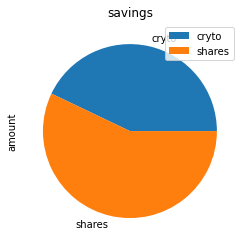

In [41]:
# Plot savings pie chart

df_savings.plot.pie(y="amount", title="savings")

In [42]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

In [43]:
# Calculate total amount of savings
total_amount_savings = cryto + shares
# Validate saving health
if total_amount_savings > emergency_fund:
    print("congratulating the person for having enough money in this fund")
if total_amount_savings == emergency_fund:
    print("congratulating the person on reaching this financial goal")
if total_amount_savings < emergency_fund:
    print("how many dollars away the person is from reaching the goal")


congratulating the person for having enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [97]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-07-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-07-01', tz='America/New_York').isoformat()

In [98]:
# Get 5 years' worth of historical data for SPY and AGG
df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
df_ticker.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-07-03 04:00:00+00:00,109.30,109.30,109.01,109.09,1817281,7321,109.130388,AGG
2017-07-05 04:00:00+00:00,109.08,109.18,109.00,109.15,4288609,12388,109.122387,AGG
2017-07-06 04:00:00+00:00,108.95,109.00,108.82,108.94,2284910,10712,108.928442,AGG
2017-07-07 04:00:00+00:00,108.89,108.95,108.83,108.90,2727445,9963,108.889505,AGG
2017-07-10 04:00:00+00:00,108.97,109.02,108.89,108.95,2386444,9654,108.953151,AGG


In [99]:
# Reorganize the DataFrame

p2_AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
p2_SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)

In [100]:
# Concatenate the ticker DataFrames
dfp2_close_price= pd.concat([p2_AGG, p2_SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
dfp2_close_price.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2017-07-03 04:00:00+00:00  109.30  109.30  109.01  109.09  1817281   
2017-07-05 04:00:00+00:00  109.08  109.18  109.00  109.15  4288609   
2017-07-06 04:00:00+00:00  108.95  109.00  108.82  108.94  2284910   
2017-07-07 04:00:00+00:00  108.89  108.95  108.83  108.90  2727445   
2017-07-10 04:00:00+00:00  108.97  109.02  108.89  108.95  2386444   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2017-07-03 04:00:00+00:00        7321  109.130388  242.90  243.38  242.2100   
2017-07-05 04:00:00+00:00       12388  109.122387  242.61  243.01  241.7000   
2017-07-06 04:00:00+00:00       10712  108.928442  241.86  242.03  240.3400   
2017-07-07 04:00:00+00:00        9963  108.889505  241.18  242.28  240.5645   
2017-07-10 04:00:00+00:00        9654  108.953151  241.98  242.80  241.7600   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2017-07-03 04:00:00+00:00  242.21  39153806      134045  242.802969  
2017-07-05 04:00:00+00:00  242.77  54427596      184987  242.525892  
2017-07-06 04:00:00+00:00  240.55  66115317      243341  241.125448  
2017-07-07 04:00:00+00:00  242.11  57972268      170407  241.801297  
2017-07-10 04:00:00+00:00  242.37  36663274      138842  242.377829

In [105]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_30years = MCSimulation(
    portfolio_data = dfp2_close_price,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [106]:
# Printing the simulation input data
MC_30years.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2017-07-03 04:00:00+00:00  109.30  109.30  109.01  109.09  1817281   
2017-07-05 04:00:00+00:00  109.08  109.18  109.00  109.15  4288609   
2017-07-06 04:00:00+00:00  108.95  109.00  108.82  108.94  2284910   
2017-07-07 04:00:00+00:00  108.89  108.95  108.83  108.90  2727445   
2017-07-10 04:00:00+00:00  108.97  109.02  108.89  108.95  2386444   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-07-03 04:00:00+00:00        7321  109.130388          NaN  242.90   
2017-07-05 04:00:00+00:00       12388  109.122387     0.000550  242.61   
2017-07-06 04:00:00+00:00       10712  108.928442    -0.001924  241.86   
2017-07-07 04:00:00+00:00        9963  108.889505    -0.000367  241.18   
2017-07-10 04:00:00+00:00        9654  108.953151     0.000459  241.98   

                                                                           \
                             high       low   close    volume trade_count   
timestamp                                                                   
2017-07-03 04:00:00+00:00  243.38  242.2100  242.21  39153806      134045   
2017-07-05 04:00:00+00:00  243.01  241.7000  242.77  54427596      184987   
2017-07-06 04:00:00+00:00  242.03  240.3400  240.55  66115317      243341   
2017-07-07 04:00:00+00:00  242.28  240.5645  242.11  57972268      170407   
2017-07-10 04:00:00+00:00  242.80  241.7600  242.37  36663274      138842   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-07-03 04:00:00+00:00  242.802969          NaN  
2017-07-05 04:00:00+00:00  242.525892     0.002312  
2017-07-06 04:00:00+00:00  241.125448    -0.009144  
2017-07-07 04:00:00+00:00  241.801297     0.006485  
2017-07-10 04:00:00+00:00  242.377829     0.001074

In [107]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 110.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 120.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 130.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 140.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 150.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 160.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 170.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 180.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 190.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 200.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 210.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 220.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 230.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 240.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 250.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 260.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 270.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 280.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 290.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 300.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 310.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 320.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 330.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 340.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 350.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 360.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 370.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 380.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 390.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 400.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 410.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 420.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 430.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 440.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 450.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 460.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 470.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 480.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 490.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000519,0.997448,1.003527,1.018496,1.000173,0.992431,0.991331,1.008084,0.996206,1.003579,...,1.005963,1.002475,0.995376,0.990914,1.004179,1.003583,1.002384,1.005162,1.009294,1.002498
2,1.018318,0.991801,0.997381,1.019077,0.989092,0.998527,0.985074,1.008441,0.981117,0.998880,...,1.013986,1.000380,0.985224,0.995867,1.000212,1.010464,1.004106,1.006110,0.997052,1.001444
3,1.014851,0.994635,1.001843,1.012884,0.984715,1.012211,0.997973,1.019242,0.981323,1.011525,...,1.010892,0.990339,0.991323,0.989468,0.998277,1.006327,1.007306,0.993560,1.000565,1.006997
4,1.025450,0.966466,1.022250,1.013864,0.986369,1.015182,0.998551,1.026427,0.982066,1.015612,...,1.005064,0.984233,0.982710,0.995084,0.979220,1.004415,1.002733,1.000116,0.994354,1.015579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.200860,3.259790,8.616310,2.697501,9.071230,6.176855,0.661322,4.697562,11.723551,3.801355,...,13.673000,5.212496,6.881586,14.700550,2.588326,13.796375,2.154929,7.850958,3.601925,3.044836
7557,3.176631,3.285352,8.573708,2.646375,9.049291,6.247936,0.662095,4.681781,11.699738,3.806137,...,13.656671,5.224004,6.921646,14.631453,2.569393,13.763392,2.161233,7.733465,3.620074,3.062591
7558,3.225274,3.316304,8.486276,2.647447,8.980484,6.296143,0.665595,4.699397,11.628430,3.745273,...,13.878651,5.239255,6.910210,14.577994,2.592979,13.983955,2.145163,7.696978,3.627029,3.024826
7559,3.172374,3.386015,8.567240,2.645029,9.045594,6.334753,0.663316,4.725149,11.554499,3.714015,...,13.946193,5.231360,6.937351,14.618581,2.605343,14.051967,2.159286,7.610199,3.653860,3.058214


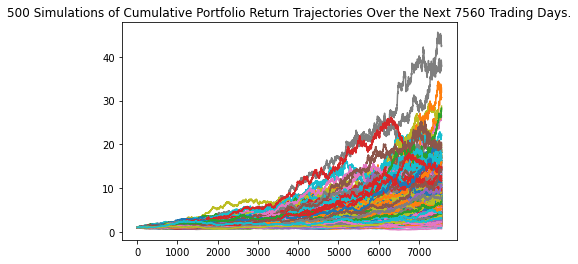

In [108]:
# Plot simulation outcomes
line_plot = MC_30years.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_30years_sim_plot.png", bbox_inches="tight")

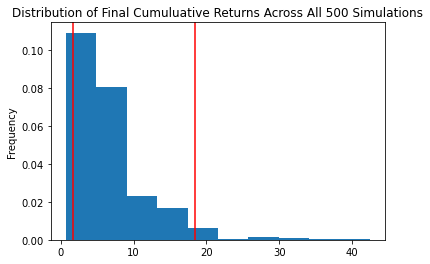

In [109]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30years.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_30years_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [110]:
# Fetch summary statistics from the Monte Carlo simulation results
total = MC_30years.summarize_cumulative_return()

# Print summary statistics
print(total)

count           500.000000
mean              6.689412
std               5.253665
min               0.660640
25%               3.238953
50%               5.073796
75%               8.237111
max              42.507880
95% CI Lower      1.584910
95% CI Upper     18.430817
Name: 7560, dtype: float64


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [111]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(total[8]*initial_investment,2)
ci_upper = round(total[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $31698.19 and $368616.34


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [67]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(total[8]*initial_investment,2)
ci_upper = round(total[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $132431.33 and $1670860.18


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [68]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

MC_5years = MCSimulation(
    portfolio_data = dfp2_close_price,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [69]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 110.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 120.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 130.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 140.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 150.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 160.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 170.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 180.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 190.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 200.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 210.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 220.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 230.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 240.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 250.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 260.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 270.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 280.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 290.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 300.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 310.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 320.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 330.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 340.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 350.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 360.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 370.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 380.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 390.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 400.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 410.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 420.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 430.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 440.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 450.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 460.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 470.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 480.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 490.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005984,1.001719,1.014100,1.002747,1.005773,0.999932,1.009857,0.993076,1.003551,0.988090,...,0.997674,1.005595,1.007580,1.006288,0.996680,1.004961,1.002149,0.988631,1.008799,1.012802
2,1.005484,0.986578,1.006352,1.001783,1.008330,0.994804,1.011577,0.994430,1.018040,0.996689,...,0.992861,1.003202,1.010273,1.000961,1.002656,1.010581,1.004452,0.993602,1.009651,1.006695
3,1.004677,0.983166,1.007587,1.006059,1.013774,0.993622,1.011087,0.998062,1.016595,1.000826,...,0.994996,1.013762,1.006124,0.996412,1.001406,1.012282,1.014457,0.995267,1.006133,1.004104
4,1.010781,0.984269,1.000403,0.986754,1.016069,0.982310,1.015536,1.012940,1.001871,1.002264,...,0.994864,1.015359,1.011695,1.003256,1.014787,1.010078,1.008967,0.990978,0.992126,0.999224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.501118,2.386613,1.397453,1.100476,1.256697,2.053377,1.310833,1.557510,1.900464,1.555158,...,1.851465,2.260541,1.048967,1.687342,0.948166,1.721451,0.959730,1.567622,1.208831,0.878539
1257,1.496743,2.378872,1.388919,1.100983,1.256641,2.046481,1.306292,1.561750,1.905090,1.565818,...,1.871627,2.272209,1.048697,1.675919,0.935783,1.702254,0.969238,1.573597,1.200346,0.871399
1258,1.523241,2.380585,1.393511,1.095407,1.265082,2.057276,1.313706,1.550146,1.894162,1.550035,...,1.882074,2.289597,1.064225,1.682774,0.938488,1.713414,0.979256,1.584736,1.207651,0.872073
1259,1.522615,2.358800,1.404682,1.094533,1.257950,2.062962,1.305473,1.548210,1.902410,1.545655,...,1.887995,2.280945,1.062047,1.701775,0.954828,1.693383,0.974067,1.573991,1.204430,0.866382


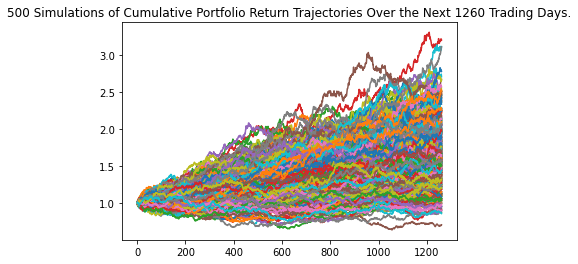

In [70]:
# Plot simulation outcome
line_plot_5years = MC_5years.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_5years_sim_plot.png", bbox_inches="tight")

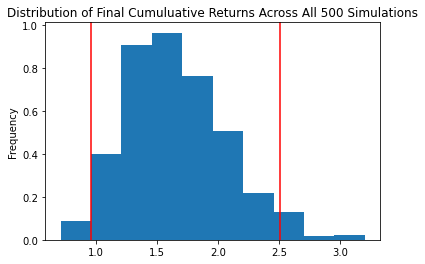

In [71]:
# Plot probability distribution and confidence intervals

dist_plot_5years = MC_5years.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_5years_dist_plot.png',bbox_inches='tight')

In [72]:
# Fetch summary statistics from the Monte Carlo simulation results
total_5years = MC_5years.summarize_cumulative_return()

# Print summary statistics
print(total_5years)

count           500.000000
mean              1.648439
std               0.403481
min               0.707273
25%               1.359286
50%               1.607679
75%               1.898343
max               3.199892
95% CI Lower      0.960941
95% CI Upper      2.503354
Name: 1260, dtype: float64


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [74]:
# Set initial investment
initial_investment_5years = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(total_5years[8]*initial_investment_5years,2)
ci_upper_five = round(total_5years[9]*initial_investment_5years,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5years} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $19218.82 and $50067.07


### Ten Years Retirement Option

In [75]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years = MCSimulation(
    portfolio_data = dfp2_close_price,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [76]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 110.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 120.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 130.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 140.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 150.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 160.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 170.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 180.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 190.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 200.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 210.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 220.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 230.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 240.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 250.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 260.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 270.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 280.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 290.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 300.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 310.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 320.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 330.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 340.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 350.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 360.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 370.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 380.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 390.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 400.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 410.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 420.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 430.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 440.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 450.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 460.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 470.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 480.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

Running Monte Carlo simulation number 490.


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTool

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002648,0.996365,0.990940,0.999407,1.001477,0.997388,1.013611,1.016284,1.015205,0.984241,...,0.981117,1.005579,0.994091,1.008496,1.001015,0.991100,1.003142,0.993873,1.005031,1.003369
2,1.000330,1.007845,0.989783,0.992734,1.016669,0.999028,1.001275,1.022556,1.016558,0.985053,...,0.985112,1.016159,1.007063,1.015732,1.009042,0.994258,1.006992,1.004175,1.009423,1.001963
3,0.994473,1.010160,0.994047,0.997172,1.017888,0.999726,0.999891,1.030253,1.016534,0.981323,...,0.992855,1.010143,1.002718,1.020365,1.011390,0.985053,0.997190,1.012559,1.018271,0.987700
4,0.984108,1.005588,0.984518,1.007583,1.007962,1.000429,1.000050,1.039498,1.018059,0.983448,...,0.991874,1.012688,0.996209,1.014260,1.005207,0.985745,1.000430,1.000181,1.015096,0.987926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.437696,4.135412,1.681249,2.361793,2.120436,2.100401,3.582696,3.055952,3.014990,4.683523,...,2.159472,2.865256,2.638760,3.961390,2.277037,2.153295,5.613690,1.818739,2.955232,2.057361
2517,2.429107,4.124538,1.671430,2.363910,2.152359,2.109030,3.575649,3.033220,2.992977,4.685717,...,2.155350,2.917283,2.630513,3.950505,2.274590,2.157286,5.541675,1.813214,2.941888,2.065243
2518,2.430487,4.140089,1.672898,2.373844,2.154860,2.126326,3.549825,3.041444,2.992258,4.730928,...,2.139338,2.911185,2.635952,3.964177,2.267624,2.161578,5.622594,1.812731,2.965684,2.060002
2519,2.422376,4.173186,1.676700,2.337528,2.133918,2.129755,3.575450,3.047478,3.006634,4.740343,...,2.122924,2.929799,2.665867,3.951949,2.287861,2.175441,5.616574,1.776077,2.942129,2.051513


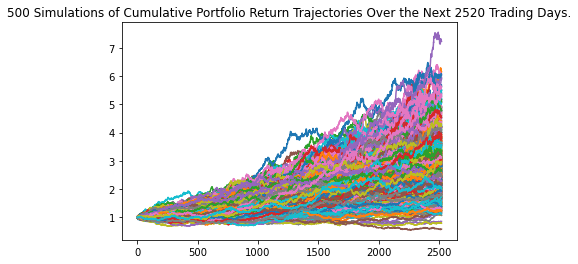

In [77]:
# Plot simulation outcomes
line_plot_10years = MC_10years.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_10years_sim_plot.png", bbox_inches="tight")

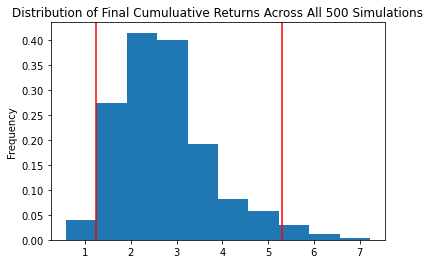

In [78]:
# Plot probability distribution and confidence intervals

dist_plot_10years = MC_10years.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_10years_dist_plot.png',bbox_inches='tight')

In [79]:
# Fetch summary statistics from the Monte Carlo simulation results
total_10years = MC_10years.summarize_cumulative_return()

# Print summary statistics
print(total_5years)


count           500.000000
mean              1.648439
std               0.403481
min               0.707273
25%               1.359286
50%               1.607679
75%               1.898343
max               3.199892
95% CI Lower      0.960941
95% CI Upper      2.503354
Name: 1260, dtype: float64


C:\Users\Chiny\Desktop\UM FinTech\Starter_Code_module_5\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [80]:
# Set initial investment

initial_investment_10years = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(total_10years[8]*initial_investment_10years,2)
ci_upper_ten = round(total_10years[9]*initial_investment_10years,2)


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10years} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $24849.09 and $106154.05
